<a href="https://colab.research.google.com/github/Data-pageup/deep-learning/blob/main/LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
df# ====== BATCH 1: SMS SPAM PREPROCESSING ======
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. Load dataset ---
df = pd.read_table('/content/SMSSpamCollection', header=None, names=['label', 'message'])
print("Shape:", df.shape)
print(df.head())

# --- 2. Encode labels ---
df['label'] = df['label'].map({'ham': 0, 'spam': 1})

# --- 3. Text preprocessing (minimal) ---
df['message'] = df['message'].str.lower()

# --- 4. Tokenization ---
tokenizer = Tokenizer(num_words=10000, oov_token='<OOV>')
tokenizer.fit_on_texts(df['message'])
sequences = tokenizer.texts_to_sequences(df['message'])

# --- 5. Padding sequences ---
max_len = 100
X = pad_sequences(sequences, maxlen=max_len, padding='post', truncating='post')

y = df['label'].values

# --- 6. Train-test split ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(f"Training samples: {X_train.shape[0]}, Test samples: {X_test.shape[0]}")

# --- 7. Inspect one example ---
print("\nExample message:\n", df['message'][0])
print("Tokenized sequence (first 10 tokens):", sequences[0][:10])
print("Label:", df['label'][0])

print("\n✅ Preprocessing complete. Data ready for LSTM model.")


Shape: (5572, 2)
  label                                            message
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...
Training samples: 4457, Test samples: 1115

Example message:
 go until jurong point, crazy.. available only in bugis n great world la e buffet... cine there got amore wat...
Tokenized sequence (first 10 tokens): [50, 472, 4437, 843, 756, 659, 65, 9, 1328, 89]
Label: 0

✅ Preprocessing complete. Data ready for LSTM model.


In [ ]:
# ====== BATCH 2: BUILD LSTM MODEL  ======
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
tf.random.set_seed(42)

# --- 1. Model hyperparameters ---
VOCAB_SIZE = min(10000, len(tokenizer.word_index) + 1)  # consistent with tokenizer
EMBED_DIM = 64
LSTM_UNITS = 128     # your choice (upgraded)
MAX_LEN = max_len    # from preprocessing (100)
DROPOUT_RATE = 0.0   # baseline model: no dropout here (you'll try dropout for the other version)

# --- 2. Build model ---
model = Sequential([
    Embedding(input_dim=VOCAB_SIZE, output_dim=EMBED_DIM, input_length=MAX_LEN, name="embedding"),
    LSTM(LSTM_UNITS, name="lstm_layer"),
    # you can optionally add Dropout here, but baseline is without it
    Dense(1, activation='sigmoid', name="output")
])

# --- 3. Compile ---
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# --- 4. Summary ---
model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_layer (LSTM)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# ====== BATCH 4: BASELINE LSTM(64) ======
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

# --- Model A: Baseline LSTM (64 units) ---
model_base = Sequential([
    Embedding(input_dim=VOCAB_SIZE, output_dim=EMBED_DIM, input_length=MAX_LEN),
    LSTM(64),
    Dense(1, activation='sigmoid')
])

model_base.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# --- Train ---
history_base = model_base.fit(
    X_train, y_train,
    validation_split=0.1,
    epochs=5,
    batch_size=32,
    verbose=1
)

# --- Evaluate ---
loss_base, acc_base = model_base.evaluate(X_test, y_test, verbose=0)
print(f"\n📊 Baseline LSTM(64) Test Accuracy: {acc_base*100:.2f}% (Loss: {loss_base:.4f})")


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
126/126 ━━━━━━━━━━━━━━━━━━━━ 11s 64ms/step - accuracy: 0.8348 - loss: 0.4559 - val_accuracy: 0.8453 - val_loss: 0.4366
Epoch 2/5
126/126 ━━━━━━━━━━━━━━━━━━━━ 10s 80ms/step - accuracy: 0.8615 - loss: 0.4038 - val_accuracy: 0.8453 - val_loss: 0.4361
Epoch 3/5
126/126 ━━━━━━━━━━━━━━━━━━━━ 7s 55ms/step - accuracy: 0.8615 - loss: 0.4035 - val_accuracy: 0.8453 - val_loss: 0.4361
Epoch 4/5
126/126 ━━━━━━━━━━━━━━━━━━━━ 7s 52ms/step - accuracy: 0.8615 - loss: 0.4034 - val_accuracy: 0.8453 - val_loss: 0.4361
Epoch 5/5
126/126 ━━━━━━━━━━━━━━━━━━━━ 7s 57ms/step - accuracy: 0.8615 - loss: 0.4033 - val_accuracy: 0.8453 - val_loss: 0.4362

📊 Baseline LSTM(64) Test Accuracy: 86.64% (Loss: 0.3944)


In [ ]:
model_base.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 100, 64)        │       576,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 64)             │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,829,381 (6.98 MB)

 Trainable params: 609,793 (2.33 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,219,588 (4.65 MB)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.8614 - loss: 0.4569
Epoch 1: val_loss improved from inf to 0.43804, saving model to sms_lstm_dropout.h5


126/126 ━━━━━━━━━━━━━━━━━━━━ 12s 67ms/step - accuracy: 0.8615 - loss: 0.4565 - val_accuracy: 0.8453 - val_loss: 0.4380
Epoch 2/5
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.8614 - loss: 0.4065
Epoch 2: val_loss improved from 0.43804 to 0.43595, saving model to sms_lstm_dropout.h5


126/126 ━━━━━━━━━━━━━━━━━━━━ 7s 54ms/step - accuracy: 0.8615 - loss: 0.4064 - val_accuracy: 0.8453 - val_loss: 0.4360
Epoch 3/5
125/126 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.8614 - loss: 0.4070
Epoch 3: val_loss did not improve from 0.43595
126/126 ━━━━━━━━━━━━━━━━━━━━ 7s 59ms/step - accuracy: 0.8615 - loss: 0.4068 - val_accuracy: 0.8453 - val_loss: 0.4360
Epoch 4/5
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.8614 - loss: 0.4064
Epoch 4: val_loss did not improve from 0.43595
126/126 ━━━━━━━━━━━━━━━━━━━━ 6s 50ms/step - accuracy: 0.8615 - loss: 0.4063 - val_accuracy: 0.8453 - val_loss: 0.4369
Epoch 5/5
125/126 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.8614 - loss: 0.4075
Epoch 5: val_loss did not improve from 0.43595
126/126 ━━━━━━━━━━━━━━━━━━━━ 7s 58ms/step - accuracy: 0.8615 - loss: 0.4073 - val_accuracy: 0.8453 - val_loss: 0.4361
Epoch 5: early stopping
Restoring model weights from the end of the best epoch: 2.

📊 LSTM(64) + Dropout(0.3) Test Accuracy: 86.6

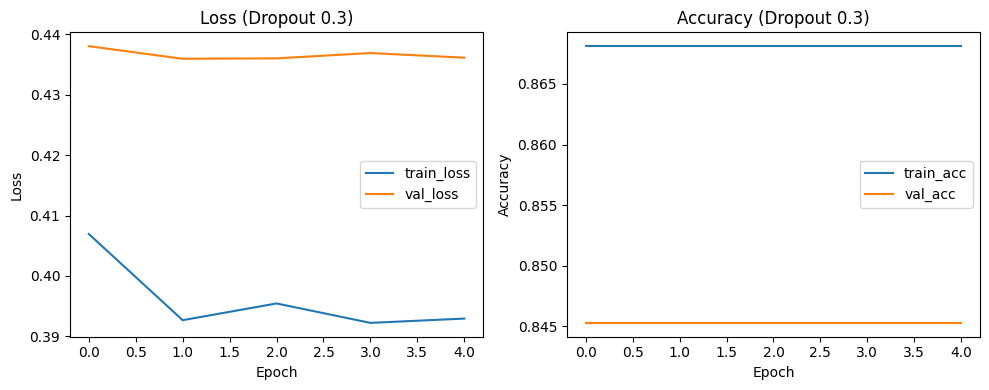

In [ ]:
#another version ( dropout 0.3)

# ====== BATCH 5: LSTM(64) + DROPOUT(0.3) ======
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# --- 1. Build model ---
model_drop = Sequential([
    Embedding(input_dim=VOCAB_SIZE, output_dim=EMBED_DIM, input_length=MAX_LEN),
    LSTM(64, return_sequences=False),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

model_drop.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


# --- 2. Train model ---
EPOCHS = 5
BATCH_SIZE = 32
MODEL_FILE_DROP = "sms_lstm_dropout.h5"

es = EarlyStopping(monitor="val_loss", patience=3, restore_best_weights=True, verbose=1)
mc = ModelCheckpoint(MODEL_FILE_DROP, monitor="val_loss", save_best_only=True, verbose=1)

history_drop = model_drop.fit(
    X_train, y_train,
    validation_split=0.1,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    callbacks=[es, mc],
    verbose=1
)

# --- 3. Evaluate ---
loss_drop, acc_drop = model_drop.evaluate(X_test, y_test, verbose=0)
print(f"\n📊 LSTM(64) + Dropout(0.3) Test Accuracy: {acc_drop*100:.2f}% (Loss: {loss_drop:.4f})")

# --- 4. Plot learning curves ---
import matplotlib.pyplot as plt

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(history_drop.history['loss'], label='train_loss')
plt.plot(history_drop.history['val_loss'], label='val_loss')
plt.title('Loss (Dropout 0.3)')
plt.xlabel('Epoch'); plt.ylabel('Loss'); plt.legend()

plt.subplot(1,2,2)
plt.plot(history_drop.history['accuracy'], label='train_acc')
plt.plot(history_drop.history['val_accuracy'], label='val_acc')
plt.title('Accuracy (Dropout 0.3)')
plt.xlabel('Epoch'); plt.ylabel('Accuracy'); plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
model_drop.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ (None, 100, 64)        │       576,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,829,381 (6.98 MB)

 Trainable params: 609,793 (2.33 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,219,588 (4.65 MB)